In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

**Data Loading**

In [ ]:
# Load the data
data_df = pd.read_csv("/content/2022_Green_Taxi_Trip_Data_20240419.csv")
data_df = pd.DataFrame(data_df)
data_df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,01/01/2022 12:14:21 AM,01/01/2022 12:15:33 AM,N,1.0,42,42,1.0,0.44,3.50,0.50,0.5,0.00,0.0,NaN,0.3,4.80,2.0,1.0,0.00
1,1,01/01/2022 12:20:55 AM,01/01/2022 12:29:38 AM,N,1.0,116,41,1.0,2.10,9.50,0.50,0.5,0.00,0.0,NaN,0.3,10.80,2.0,1.0,0.00
2,1,01/01/2022 12:57:02 AM,01/01/2022 01:13:14 AM,N,1.0,41,140,1.0,3.70,14.50,3.25,0.5,4.60,0.0,NaN,0.3,23.15,1.0,1.0,2.75
3,2,01/01/2022 12:07:42 AM,01/01/2022 12:15:57 AM,N,1.0,181,181,1.0,1.69,8.00,0.50,0.5,0.00,0.0,NaN,0.3,9.30,2.0,1.0,0.00
4,2,01/01/2022 12:07:50 AM,01/01/2022 12:28:52 AM,N,1.0,33,170,1.0,6.26,22.00,0.50,0.5,5.21,0.0,NaN,0.3,31.26,1.0,1.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840397,2,12/31/2022 11:33:00 PM,12/31/2022 11:49:00 PM,NaN,NaN,33,79,NaN,3.53,20.72,0.00,0.0,4.89,0.0,NaN,1.0,29.36,NaN,NaN,NaN
840398,2,12/31/2022 11:29:00 PM,01/01/2023 12:01:00 AM,NaN,NaN,49,197,NaN,8.94,39.01,0.00,0.0,8.00,0.0,NaN,1.0,48.01,NaN,NaN,NaN
840399,2,12/31/2022 11:05:00 PM,12/31/2022 11:12:00 PM,NaN,NaN,54,181,NaN,1.27,12.11,0.00,0.0,2.62,0.0,NaN,1.0,15.73,NaN,NaN,NaN
840400,2,12/31/2022 11:03:00 PM,12/31/2022 11:18:00 PM,NaN,NaN,7,129,NaN,2.23,15.51,0.00,0.0,3.30,0.0,NaN,1.0,19.81,NaN,NaN,NaN


In [ ]:
# Describe columns and rows size
print("Columns:")
print(data_df.columns)
print("\nSize:")
print("Rows:", len(data_df))
print("Columns:", len(data_df.columns))

Columns:
Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

Size:
Rows: 840402
Columns: 20


In [ ]:
# Investigate the data types
print(data_df.dtypes)

VendorID                   int64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID               float64
PULocationID               int64
DOLocationID               int64
passenger_count          float64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
ehail_fee                float64
improvement_surcharge    float64
total_amount             float64
payment_type             float64
trip_type                float64
congestion_surcharge     float64
dtype: object


In [ ]:
# Display basic information about the dataset
print("Dataset Info:")
print(data_df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840402 entries, 0 to 840401
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               840402 non-null  int64  
 1   lpep_pickup_datetime   840402 non-null  object 
 2   lpep_dropoff_datetime  840402 non-null  object 
 3   store_and_fwd_flag     750062 non-null  object 
 4   RatecodeID             750062 non-null  float64
 5   PULocationID           840402 non-null  int64  
 6   DOLocationID           840402 non-null  int64  
 7   passenger_count        750062 non-null  float64
 8   trip_distance          840402 non-null  float64
 9   fare_amount            840402 non-null  float64
 10  extra                  840402 non-null  float64
 11  mta_tax                840402 non-null  float64
 12  tip_amount             840402 non-null  float64
 13  tolls_amount           840402 non-null  float64
 14  ehail_fee             

In [ ]:
# remove unnecessary columns
remove_columns = data_df.drop(['tolls_amount', 'ehail_fee', 'remove'], axis=1, errors='ignore')

# Display the updated DataFrame
print(remove_columns.head())

   VendorID    lpep_pickup_datetime   lpep_dropoff_datetime  \
0         2  01/01/2022 12:14:21 AM  01/01/2022 12:15:33 AM   
1         1  01/01/2022 12:20:55 AM  01/01/2022 12:29:38 AM   
2         1  01/01/2022 12:57:02 AM  01/01/2022 01:13:14 AM   
3         2  01/01/2022 12:07:42 AM  01/01/2022 12:15:57 AM   
4         2  01/01/2022 12:07:50 AM  01/01/2022 12:28:52 AM   

  store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  passenger_count  \
0                  N         1.0            42            42              1.0   
1                  N         1.0           116            41              1.0   
2                  N         1.0            41           140              1.0   
3                  N         1.0           181           181              1.0   
4                  N         1.0            33           170              1.0   

   trip_distance  fare_amount  extra  mta_tax  tip_amount  \
0           0.44          3.5   0.50      0.5        0.00   
1           

In [ ]:
# Handling missing values

# Removing NaN and NA values
data_df= remove_columns.dropna()

# Displaying the cleaned DataFrame
print(data_df.head())


   VendorID    lpep_pickup_datetime   lpep_dropoff_datetime  \
0         2  01/01/2022 12:14:21 AM  01/01/2022 12:15:33 AM   
1         1  01/01/2022 12:20:55 AM  01/01/2022 12:29:38 AM   
2         1  01/01/2022 12:57:02 AM  01/01/2022 01:13:14 AM   
3         2  01/01/2022 12:07:42 AM  01/01/2022 12:15:57 AM   
4         2  01/01/2022 12:07:50 AM  01/01/2022 12:28:52 AM   

  store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  passenger_count  \
0                  N         1.0            42            42              1.0   
1                  N         1.0           116            41              1.0   
2                  N         1.0            41           140              1.0   
3                  N         1.0           181           181              1.0   
4                  N         1.0            33           170              1.0   

   trip_distance  fare_amount  extra  mta_tax  tip_amount  \
0           0.44          3.5   0.50      0.5        0.00   
1           

In [ ]:
#  Convert pickup and dropoff datetime columns to datetime objects
data_df['lpep_pickup_datetime'] = pd.to_datetime(data_df['lpep_pickup_datetime'])
data_df['lpep_dropoff_datetime'] = pd.to_datetime(data_df['lpep_dropoff_datetime'])

# Calculate trip duration in minutes
data_df = data_df.copy()  # Create a copy of the DataFrame
data_df['trip_duration'] = (data_df['lpep_dropoff_datetime'] - data_df['lpep_pickup_datetime']).dt.total_seconds() / 60

# Extract hour from pickup datetime and assign it to 'pickup_hour' column
data_df = data_df.copy()  # Create another copy
data_df['pickup_hour'] = data_df['lpep_pickup_datetime'].dt.hour

# Aggregate pickups and drop-offs by hour
pickup_counts = data_df.groupby('pickup_hour').size()
dropoff_counts = data_df.groupby(data_df['lpep_dropoff_datetime'].dt.hour).size()

# Define peak and off-peak hours (adjust as needed)
peak_hours = range(7, 11)  # for example, peak hours from 7 AM to 10 AM
data_df['peak_hour'] = data_df['pickup_hour'].isin(peak_hours)
data_df1 = pd.DataFrame(data_df)

<ipython-input-10-8b6216690a78>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_df['lpep_pickup_datetime'] = pd.to_datetime(data_df['lpep_pickup_datetime'])
<ipython-input-10-8b6216690a78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['lpep_pickup_datetime'] = pd.to_datetime(data_df['lpep_pickup_datetime'])
<ipython-input-10-8b6216690a78>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_df['lpep_dropoff_datetime'] = pd.to_datetime(data_df['lpep_dropo

In [ ]:
# Descriptive Analysis
print("\nStatistical Descriptive Analysis:")
print(data_df1.describe())


Statistical Descriptive Analysis:
            VendorID           lpep_pickup_datetime  \
count  750047.000000                         750047   
mean        1.843256  2022-06-30 11:41:29.290849536   
min         1.000000            2008-12-31 17:04:15   
25%         2.000000            2022-03-31 15:00:26   
50%         2.000000            2022-06-25 11:01:01   
75%         2.000000            2022-09-29 11:49:31   
max         2.000000            2022-12-31 23:57:16   
std         0.363559                            NaN   

               lpep_dropoff_datetime     RatecodeID   PULocationID  \
count                         750047  750047.000000  750047.000000   
mean   2022-06-30 12:01:20.503856384       1.222997      98.644181   
min              2008-12-31 17:55:15       1.000000       1.000000   
25%              2022-03-31 15:24:53       1.000000      65.000000   
50%              2022-06-25 11:22:02       1.000000      75.000000   
75%              2022-09-29 12:05:38       1.0000

In [ ]:
# Correlation analysis
correlation_matrix = data_df1[['pickup_hour', 'trip_duration', 'fare_amount']].corr()
print(correlation_matrix)

               pickup_hour  trip_duration  fare_amount
pickup_hour       1.000000      -0.012317    -0.029257
trip_duration    -0.012317       1.000000     0.155118
fare_amount      -0.029257       0.155118     1.000000


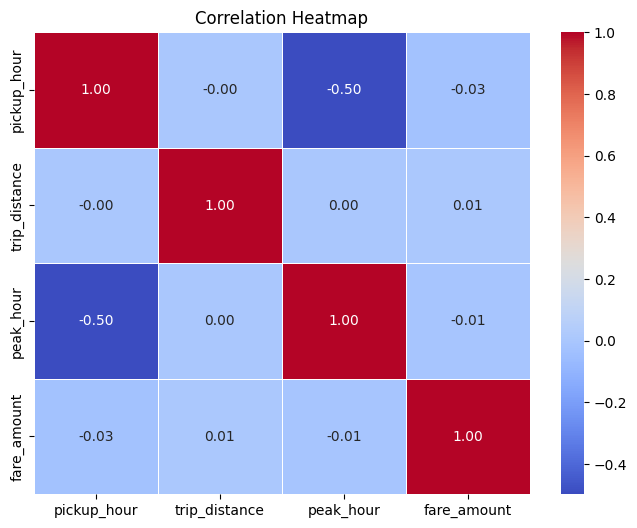

In [ ]:
# Selecting the relevant variables
features = data_df1[['pickup_hour', 'trip_distance', 'peak_hour', 'fare_amount']]

# Creating correlation matrix
correlation_matrix = features.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**Visualize distributions, relationships, and patterns in the data:**

Temporal Distribution of Taxi Pickups and Drop-offs:

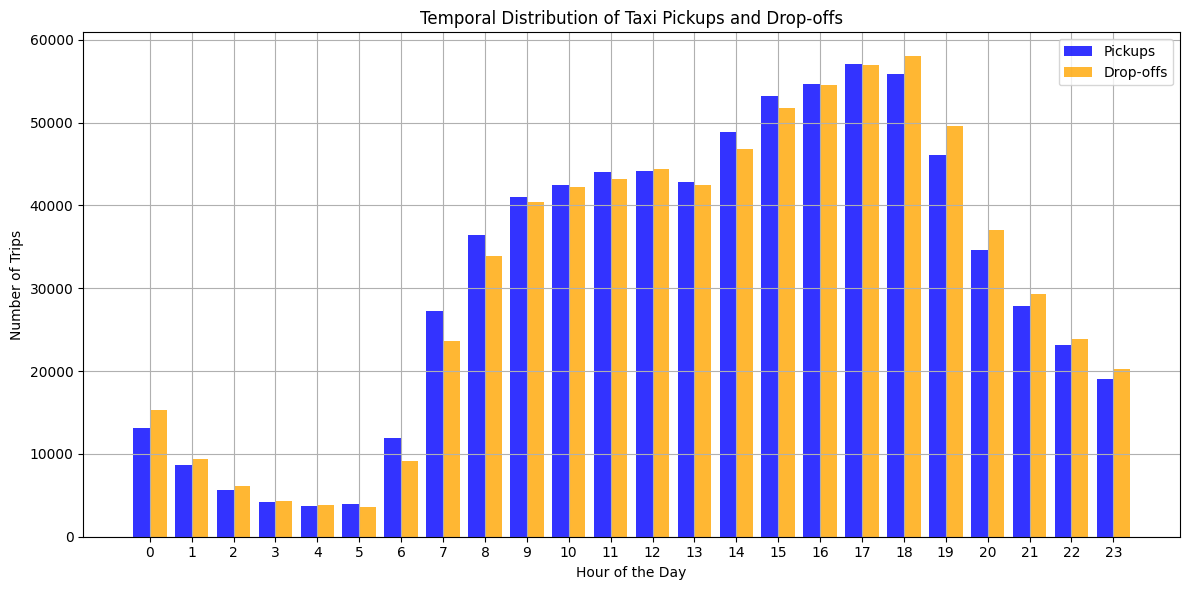

In [ ]:
# Create a bar plot for temporal distribution of pickups and drop-offs
plt.figure(figsize=(12, 6))
bar_width = 0.4
opacity = 0.8

plt.bar(pickup_counts.index, pickup_counts.values, bar_width, alpha=opacity, color='blue', label='Pickups')
plt.bar(dropoff_counts.index + bar_width, dropoff_counts.values, bar_width, alpha=opacity, color='orange', label='Drop-offs')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Temporal Distribution of Taxi Pickups and Drop-offs')
plt.xticks(pickup_counts.index + bar_width / 2, pickup_counts.index)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


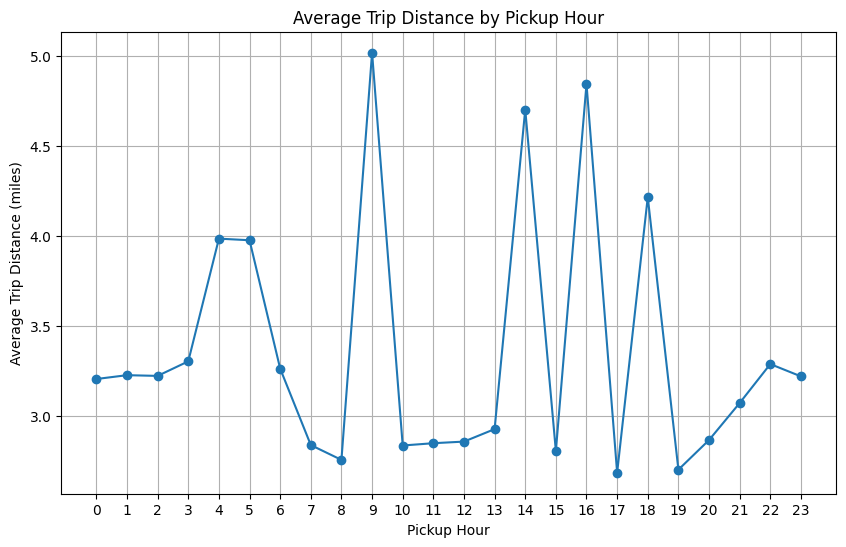

In [ ]:
average_distance_by_hour = data_df.groupby('pickup_hour')['trip_distance'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_distance_by_hour.index, average_distance_by_hour.values, marker='o', linestyle='-')
plt.title('Average Trip Distance by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Trip Distance (miles)')
plt.xticks(range(24))
plt.grid(True)
plt.show()


Trip Duration Variations between Peak and Off-peak Hours:

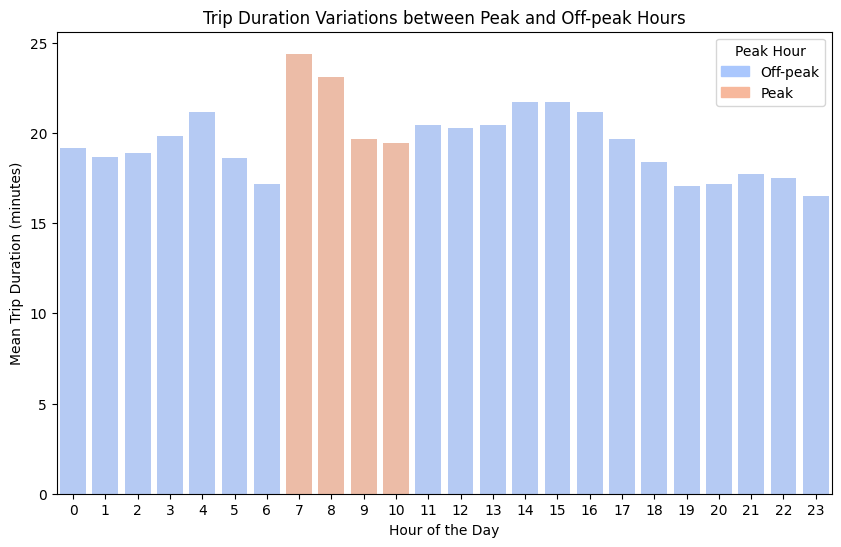

In [ ]:
# Plot trip duration variations between peak and off-peak hours
plt.figure(figsize=(10, 6))

# Compute statistics for trip duration variations between peak and off-peak hours
trip_duration_stats = data_df.groupby(['pickup_hour', 'peak_hour'])['trip_duration'].mean().reset_index()

colors = sns.color_palette("coolwarm", 2)  # Choosing a palette with 2 colors
sns.barplot(x='pickup_hour', y='trip_duration', hue='peak_hour', data=trip_duration_stats, palette=colors)

# Modify legend
legend_labels = ['Off-peak', 'Peak']
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in zip(legend_labels, colors)]
plt.legend(handles=legend_patches, title='Peak Hour', loc='upper right')

plt.xlabel('Hour of the Day')
plt.ylabel('Mean Trip Duration (minutes)')
plt.title('Trip Duration Variations between Peak and Off-peak Hours')

plt.show()

Number of Trips per Month:

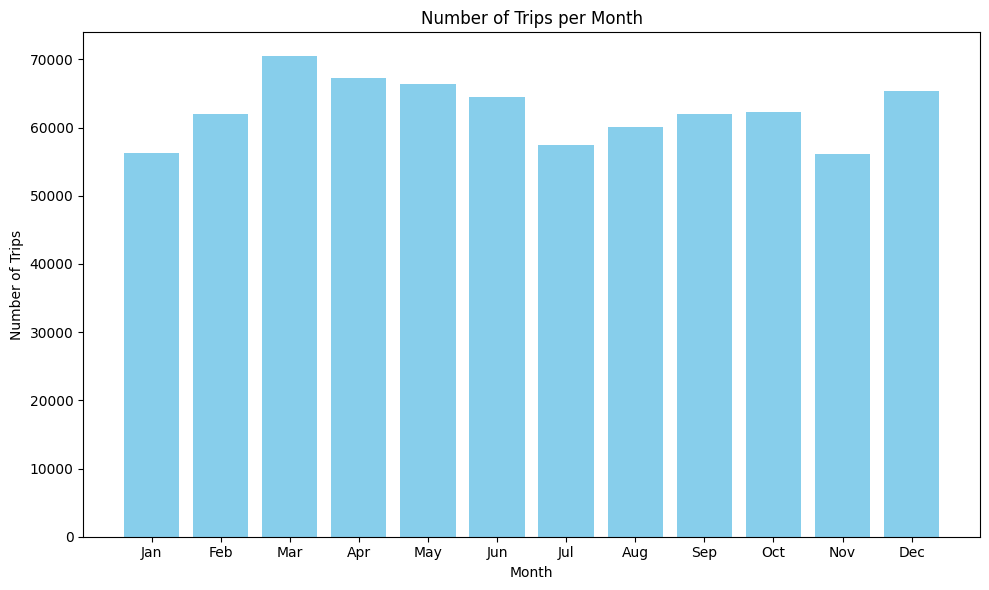

In [ ]:
# Convert pickup and dropoff datetime columns to datetime objects
data_df['lpep_pickup_datetime'] = pd.to_datetime(data_df['lpep_pickup_datetime'])
data_df['lpep_dropoff_datetime'] = pd.to_datetime(data_df['lpep_dropoff_datetime'])

# Step 3: Extract the month from the pickup datetime
data_df['pickup_month'] = data_df['lpep_pickup_datetime'].dt.month

# Step 4: Group the data by month and count the number of trips in each month
trips_per_month = data_df.groupby('pickup_month').size()

# Step 5: Plot the number of trips per month
plt.figure(figsize=(10, 6))
plt.bar(trips_per_month.index, trips_per_month.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

**Modeling:**

In [ ]:
features = ['PULocationID', 'DOLocationID','pickup_hour', 'trip_distance','fare_amount','peak_hour','passenger_count']
data_df1 = data_df1[features].dropna()

# Split the dataset into features (X) and target variable (y)
X = data_df1[['pickup_hour', 'trip_distance', 'peak_hour']]  # Features
y = data_df1['fare_amount']  # Target variable

# Split the data into training, validation, and test sets (80% train, 10% validation, 10% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Ridge Regression model:

In [ ]:
# Train and evaluate Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_y_pred = ridge_model.predict(X_val_scaled)
ridge_metrics = {
    "R-squared": r2_score(y_val, ridge_y_pred),
    "Mean Squared Error": mean_squared_error(y_val, ridge_y_pred),
    "Root Mean Squared Error": mean_squared_error(y_val, ridge_y_pred, squared=False),
    "Mean Absolute Error": mean_absolute_error(y_val, ridge_y_pred)
}

# Final evaluation on test set
test_ridge_y_pred = ridge_model.predict(X_test_scaled)

test_ridge_metrics = {
    "R-squared": r2_score(y_test, test_ridge_y_pred),
    "Mean Squared Error": mean_squared_error(y_test, test_ridge_y_pred),
    "Root Mean Squared Error": mean_squared_error(y_test, test_ridge_y_pred, squared=False),
    "Mean Absolute Error": mean_absolute_error(y_test, test_ridge_y_pred)
}
print("Ridge Regression Metrics:")
for key, value in test_ridge_metrics.items():
    print(f"{key}: {value}")


Ridge Regression Metrics:
R-squared: 0.0009496691634151011
Mean Squared Error: 267.3315224035076
Root Mean Squared Error: 16.3502759121523
Mean Absolute Error: 8.090072546216138


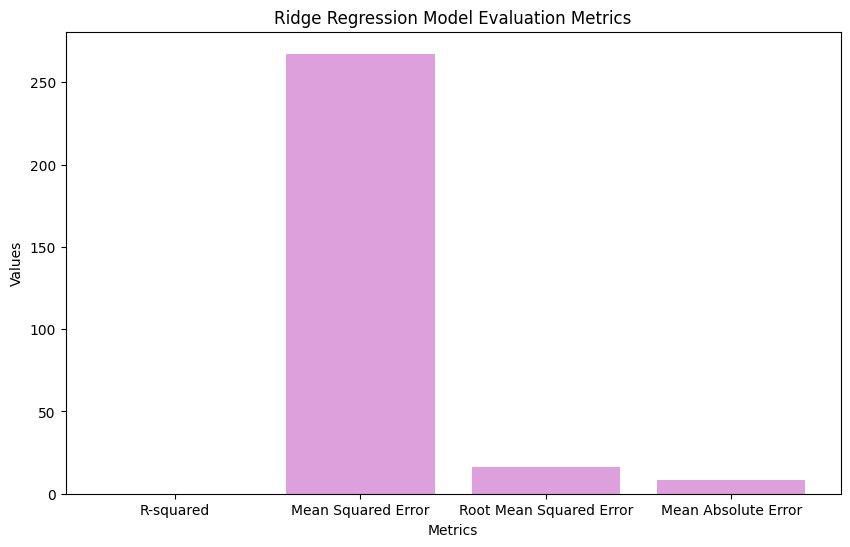

In [ ]:
# Plotting Ridge Regression Metrics
metrics_names = list(test_ridge_metrics.keys())
metrics_values = list(test_ridge_metrics.values())

plt.figure(figsize=(10, 6))
plt.bar(metrics_names, metrics_values, color= 'plum')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Ridge Regression Model Evaluation Metrics')
plt.show()

Random Forest Model

In [ ]:
# Train and evaluate Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_y_pred = rf_model.predict(X_val_scaled)
rf_metrics = {
    "R-squared": r2_score(y_val, rf_y_pred),
    "Mean Squared Error": mean_squared_error(y_val, rf_y_pred),
    "Root Mean Squared Error": mean_squared_error(y_val, rf_y_pred, squared=False),
    "Mean Absolute Error": mean_absolute_error(y_val, rf_y_pred)
}

# Final evaluation on test set
test_rf_y_pred = rf_model.predict(X_test_scaled)

test_rf_metrics = {
    "R-squared": r2_score(y_test, test_rf_y_pred),
    "Mean Squared Error": mean_squared_error(y_test, test_rf_y_pred),
    "Root Mean Squared Error": mean_squared_error(y_test, test_rf_y_pred, squared=False),
    "Mean Absolute Error": mean_absolute_error(y_test, test_rf_y_pred)
}
print("Random Forest Regression Metrics:")
for key, value in test_rf_metrics.items():
    print(f"{key}: {value}")

Random Forest Regression Metrics:
R-squared: 0.37793141645351647
Mean Squared Error: 166.4566201981235
Root Mean Squared Error: 12.901806857883258
Mean Absolute Error: 3.5574193802922527


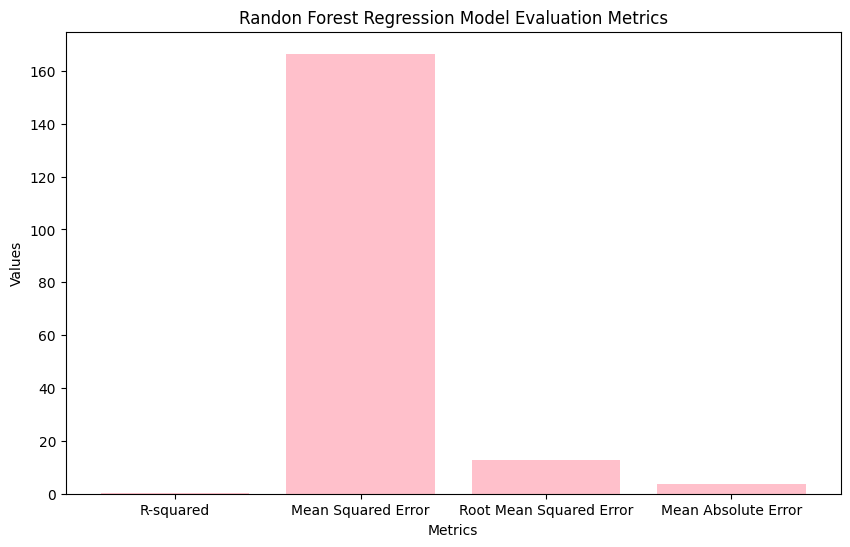

In [ ]:
# Plotting Randon Forest Regression Metrics
metrics_names2 = list(test_rf_metrics.keys())
metrics_values2 = list(test_rf_metrics.values())

plt.figure(figsize=(10, 6))
plt.bar(metrics_names2, metrics_values2, color= 'pink')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Randon Forest Regression Model Evaluation Metrics')
plt.show()

Gradient Boosting Regression model:

In [ ]:
# Train and evaluate Gradient Boosting Regression model
gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X_train_scaled, y_train)
gbm_y_pred = gbm_model.predict(X_val_scaled)
gbm_metrics = {
    "R-squared": r2_score(y_val, gbm_y_pred),
    "Mean Squared Error": mean_squared_error(y_val, gbm_y_pred),
    "Root Mean Squared Error": mean_squared_error(y_val, gbm_y_pred, squared=False),
    "Mean Absolute Error": mean_absolute_error(y_val, gbm_y_pred)
}

# Final evaluation on test set
test_gbm_y_pred = gbm_model.predict(X_test_scaled)

test_gbm_metrics = {
    "R-squared": r2_score(y_test, test_gbm_y_pred),
    "Mean Squared Error": mean_squared_error(y_test, test_gbm_y_pred),
    "Root Mean Squared Error": mean_squared_error(y_test, test_gbm_y_pred, squared=False),
    "Mean Absolute Error": mean_absolute_error(y_test, test_gbm_y_pred)
}
print("Gradient Boosting Regression Metrics:")
for key, value in test_gbm_metrics.items():
    print(f"{key}: {value}")


Gradient Boosting Regression Metrics:
R-squared: 0.4074856702899621
Mean Squared Error: 158.54832626364197
Root Mean Squared Error: 12.591597446854866
Mean Absolute Error: 3.41310709174446


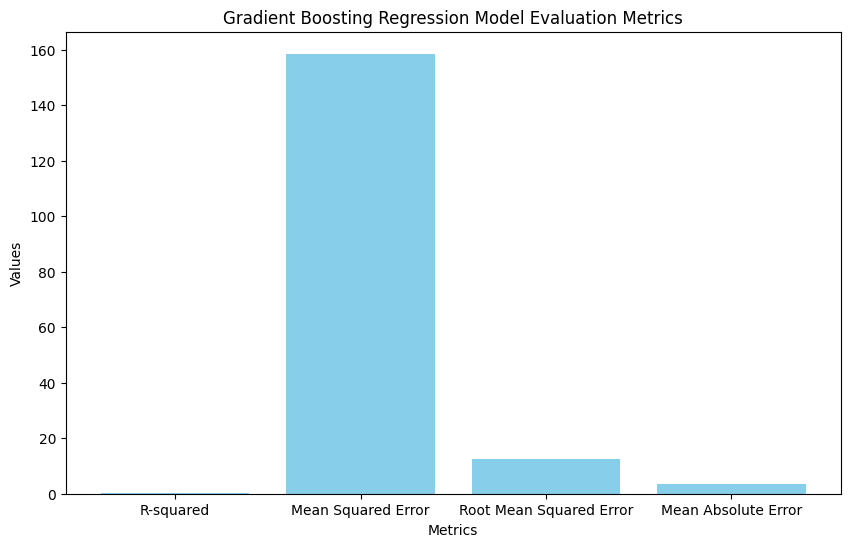

In [ ]:
# Plotting Gradient Boosting Regression Metrics
metrics_names1 = list(test_gbm_metrics.keys())
metrics_values1 = list(test_gbm_metrics.values())

plt.figure(figsize=(10, 6))
plt.bar(metrics_names1, metrics_values1, color= 'skyblue')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Gradient Boosting Regression Model Evaluation Metrics')
plt.show()

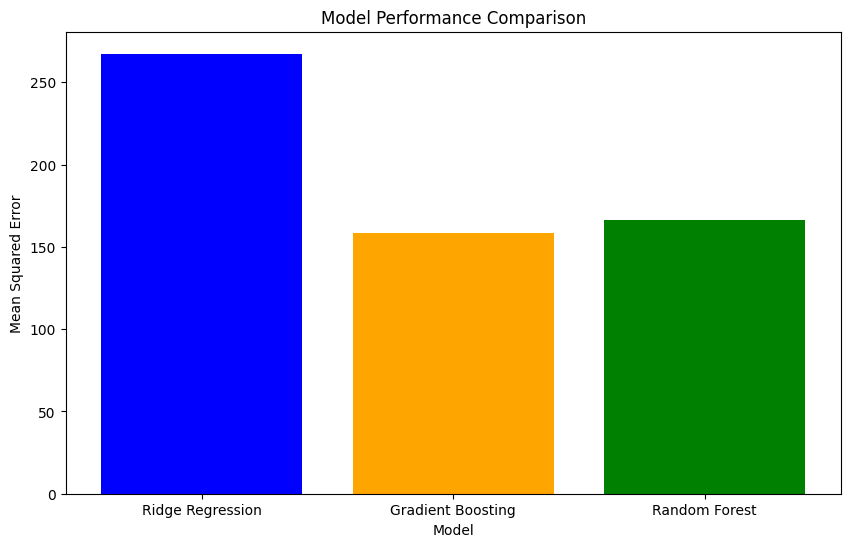

In [ ]:
plt.figure(figsize=(10, 6))
models = ['Ridge Regression', 'Gradient Boosting', 'Random Forest']
errors = [mean_squared_error(y_test, test_ridge_y_pred),
          mean_squared_error(y_test, test_gbm_y_pred),
          mean_squared_error(y_test, test_rf_y_pred)]
plt.bar(models, errors, color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance Comparison')
plt.show()


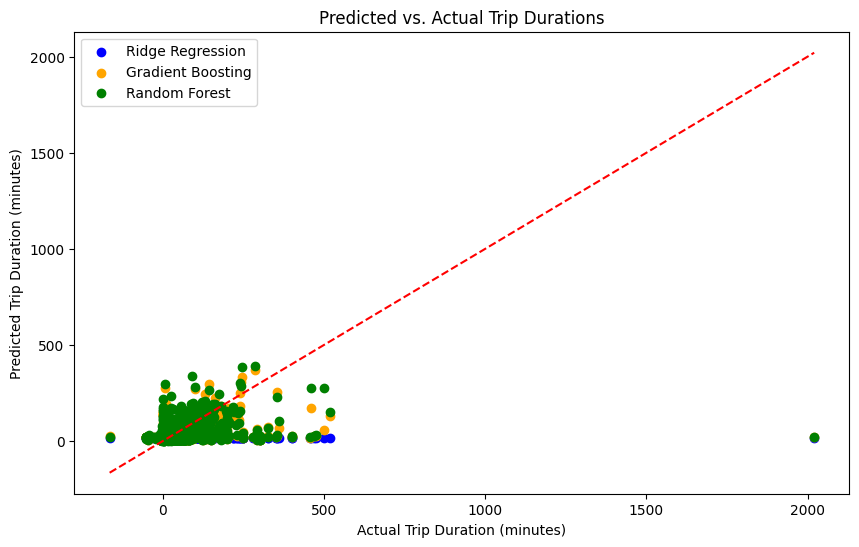

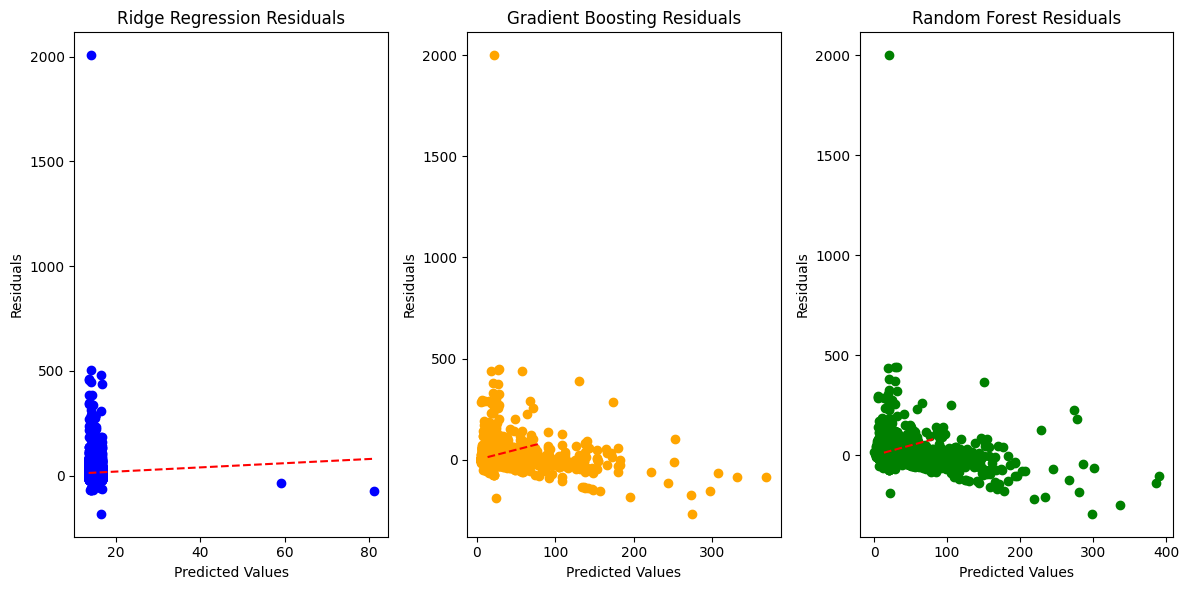

<Figure size 1000x600 with 0 Axes>

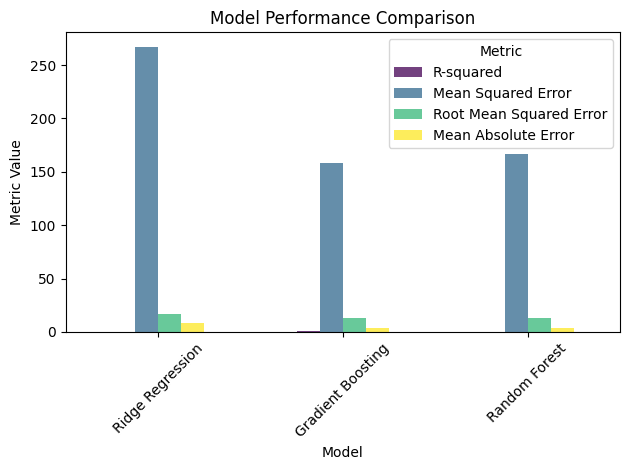

In [ ]:
# Visualizations of Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_ridge_y_pred, color='blue', label='Ridge Regression')
plt.scatter(y_test, test_gbm_y_pred, color='orange', label='Gradient Boosting')
plt.scatter(y_test, test_rf_y_pred, color='green', label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Trip Duration (minutes)')
plt.ylabel('Predicted Trip Duration (minutes)')
plt.title('Predicted vs. Actual Trip Durations')
plt.legend()
plt.show()

# Residual Plots
ridge_residuals = y_test - test_ridge_y_pred
gbm_residuals = y_test - test_gbm_y_pred
rf_residuals = y_test - test_rf_y_pred

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(test_ridge_y_pred, ridge_residuals, color='blue')
plt.plot([min(test_ridge_y_pred), max(test_ridge_y_pred)], [min(test_ridge_y_pred), max(test_ridge_y_pred)], color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Ridge Regression Residuals')

plt.subplot(1, 3, 2)
plt.scatter(test_gbm_y_pred, gbm_residuals, color='orange')
plt.plot([min(test_ridge_y_pred), max(test_ridge_y_pred)], [min(test_ridge_y_pred), max(test_ridge_y_pred)], color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Gradient Boosting Residuals')

plt.subplot(1, 3, 3)
plt.scatter(test_rf_y_pred, rf_residuals, color='green')
plt.plot([min(test_ridge_y_pred), max(test_ridge_y_pred)], [min(test_ridge_y_pred), max(test_ridge_y_pred)], color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Random Forest Residuals')

plt.tight_layout()
plt.show()

# Model Comparison Plot
metrics_df = pd.DataFrame({
    "Model": ["Ridge Regression", "Gradient Boosting", "Random Forest"],
    "R-squared": [test_ridge_metrics["R-squared"], test_gbm_metrics["R-squared"], test_rf_metrics["R-squared"]],
    "Mean Squared Error": [test_ridge_metrics["Mean Squared Error"], test_gbm_metrics["Mean Squared Error"], test_rf_metrics["Mean Squared Error"]],
    "Root Mean Squared Error": [test_ridge_metrics["Root Mean Squared Error"], test_gbm_metrics["Root Mean Squared Error"], test_rf_metrics["Root Mean Squared Error"]],
    "Mean Absolute Error": [test_ridge_metrics["Mean Absolute Error"], test_gbm_metrics["Mean Absolute Error"], test_rf_metrics["Mean Absolute Error"]]
})

plt.figure(figsize=(10, 6))
metrics_df.set_index("Model").plot(kind='bar', colormap='viridis', alpha=0.75)
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()